# Project: World Progress

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

In [3]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the NumPy and Datascience modules.
from datascience import *
import numpy as np

# These lines do some fancy plotting magic.
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import d8error

## 1. Global Population Growth

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="https://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
    <img src="pew_population_projection.png"/> 
</a>

In this part of the project, I will examine some of the factors that influence population growth and how they have been changing over the years and around the world. There are two main sub-parts of this analysis.

- First, I will examine the data for one country, Bangladesh. I will see how factors such as life expectancy, fertility rate, and child mortality have changed over time in Bangladesh, and how they are related to the rate of population growth.
- Next, I will examine whether the changes I have observed for Bangladesh are particular to that country or whether they reflect general patterns observable in other countries too. I will study aspects of world population growth and see how they have been changing.

The first table we will consider contains the total population of each country over time. Run the cell below.

In [4]:
population = Table.read_table('population.csv').where("time", are.below(2021))
population.show(3)

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000


**Note:** The population csv file can also be found [here](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv). The data for this project was downloaded in February 2017.

### Bangladesh

The nation of [Bangladesh](https://en.wikipedia.org/wiki/Bangladesh#People's_Republic_of_Bangladesh) was established as a parliamentary democracy after the Bangladesh Liberation War ended in 1971. The war-ravaged fledgling nation was almost immediately faced with floods and famine. In this section of the project, we will examine aspects of the development of Bangladesh since that time.

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Use the Alpha-3 link to find the 3-letter code for Bangladesh.

I created a table called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2020 (including both 1970 and 2020) and the second should contain the population of Bangladesh in each of those years.



In [5]:
bgd_pop = population.where("geo", are.equal_to("bgd")).select("time", "population_total")
b_pop = bgd_pop.where("time", are.between_or_equal_to(1970,2020))
b_pop

time,population_total
1970,64232486
1971,65531635
1972,66625706
1973,67637541
1974,68742222
1975,70066310
1976,71652386
1977,73463593
1978,75450033
1979,77529040


Then I created a table called `b_five` that has the population of Bangladesh every five years. At a glance, it appears that the population of Bangladesh has been growing quickly indeed!

In [6]:
b_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1970, 2021, 5) # 1970, 1975, 1980, ...
b_five = b_pop.sort('time').where('time', are.contained_in(fives))
b_five.show()

time,population_total
1970,"64,232,486"
1975,"70,066,310"
1980,"79,639,498"
1985,"90,764,180"
1990,"103,171,957"
1995,"115,169,933"
2000,"127,657,862"
2005,"139,035,505"
2010,"147,575,433"
2015,"156,256,287"


I assign `initial` to an array that contains the population for every five year interval from 1970 to 2015 (inclusive). Then, assign `changed` to an array that contains the population for every five year interval from 1975 to 2020 (inclusive). The first array should include both 1970 and 2015, and the second array should include both 1975 and 2020. You should use the `b_five` table to create both arrays, by first filtering the table to only contain the relevant years.

The annual growth rate for a time period is equal to:

$$(\frac{\text{Population at end of period}}{\text{Population at start of period}}^{\frac{1}{\text{number of years}}} )-1$$

I have provided the code below that uses  `initial` and `changed` in order to add a column to `b_five` called `annual_growth`.

If you are interested in how I came up with the formula for growth rates, consult the [growth rates](https://inferentialthinking.com/chapters/03/2/1/Growth.html) section of this textbook.

In [7]:
initial = b_five.where("time", are.between_or_equal_to(1970,2015)).column("population_total")
changed = b_five.where("time", are.between_or_equal_to(1975,2020)).column("population_total")

b_1970_through_2015 = b_five.where('time', are.below_or_equal_to(2015)) 
b_five_growth = b_1970_through_2015.with_column('annual_growth', (changed/initial)**0.2-1)
b_five_growth.set_format('annual_growth', PercentFormatter)

time,population_total,annual_growth
1970,"64,232,486",1.75%
1975,"70,066,310",2.59%
1980,"79,639,498",2.65%
1985,"90,764,180",2.60%
1990,"103,171,957",2.22%
1995,"115,169,933",2.08%
2000,"127,657,862",1.72%
2005,"139,035,505",1.20%
2010,"147,575,433",1.15%
2015,"156,256,287",1.06%


While the population has grown every five years since 1970, the annual growth rate decreased dramatically from 1985 to 2015. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [8]:
life_expectancy = Table.read_table('life_expectancy.csv').where('time', are.below(2021))
child_mortality = Table.read_table('child_mortality.csv').relabel(2, 'child_mortality_under_5_per_1000_born').where('time', are.below(2021))
fertility = Table.read_table('fertility.csv').where('time', are.below(2021))

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Run the following cells below to see `life_expectancy`, `child_mortality`, and `fertility`. Refer back to these tables as needed. It will be helpful for further insight to this topic.

In [9]:
life_expectancy.show(3)

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19


In [10]:
child_mortality.show(3)

geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.58
afg,1801,468.58
afg,1802,468.58


In [11]:
fertility.show(3)

geo,time,children_per_woman_total_fertility
abw,1800,5.64
abw,1801,5.64
abw,1802,5.64


Perhaps population is growing more slowly because people aren't living as long. I will use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Bangladesh.

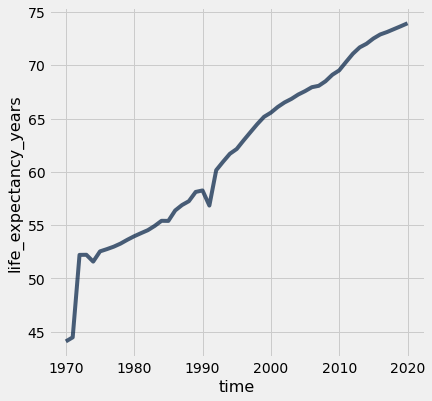

In [12]:
#Fill in code here
life_expectancy_bgd = life_expectancy.where("geo", are.equal_to("bgd")).where("time" , are.above_or_equal_to(1970))
# life_expectancy_bgd
life_expectancy_bgd.plot("time", "life_expectancy_years")

Assuming everything else stays the same, we can see the trends in life expectancy in the graph above directly explain why the population growth rate decreased from 1985 to 2015 in Bangladesh.

Futhermore, as we can see from the graph, life expectancy increases throughout the year. Possibly, the reasons why the population growth rate slowed down is because people are living longer now and thus, do not need to create more children for survival purposes. However, on 1991 we can see that the population decreased quite a bit and this is due to a cyclone that hit Bangladesh on that year

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49.

I completed the function `fertility_over_time`. It takes the Alpha-3 code of a country as `country_code` and a `start` year. It returns a two-column table with labels `Year` and `Children per woman` that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table. 

Then, determine the Alpha-3 code for Bangladesh. The code for Bangladesh and the year 1970 are used in the call to your `fertility_over_time` function in order to plot how Bangladesh's fertility rate has changed since 1970. Note that the function `fertility_over_time` should not return the plot itself. **The expression that draws the line plot is provided for you; please don't change it.**

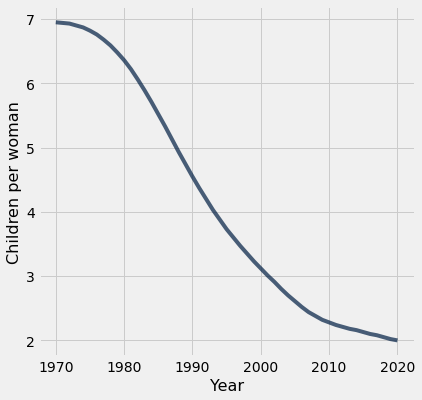

In [13]:
def fertility_over_time(country_code, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    country_fertility = fertility.where("geo", country_code)
    country_fertility_after_start = country_fertility.where("time", are.above_or_equal_to(start))
    country_fertility_after_start
    cleaned_table = country_fertility_after_start.relabeled("time", "Year").relabeled("children_per_woman_total_fertility", "Children per woman").select("Year", "Children per woman")
    return cleaned_table

bangladesh_code = "bgd"
fertility_over_time(bangladesh_code, 1970).plot(0, 1) # You should *not* change this line.

Assuming everything else is constant, we can see trends in fertility in the graph above help directly explain why the population growth rate decreased from 1980 to 2020 in Bangladesh.

As earlier we mentioned that since life expectancy is getting better, the amount of children might have decrease as well. As we can see in this grah above, it just proves what we hypothesize earlier. Since the number of birth per woman is decreasing, we can see that the rate of population growth should decrease as well.

It has been [observed](https://www.ageing.ox.ac.uk/download/143) that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. In the reverse direction, having fewer children may allow families to devote more resources to each child, reducing child mortality. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

Using both the `fertility` and `child_mortality` tables, I will draw a scatter diagram that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis with one point for each year, starting with 1970.

I also created a table called `post_1969_fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly. I used the label `Children per woman` to describe total fertility and the label `Child deaths per 1000 born` to describe child mortality.

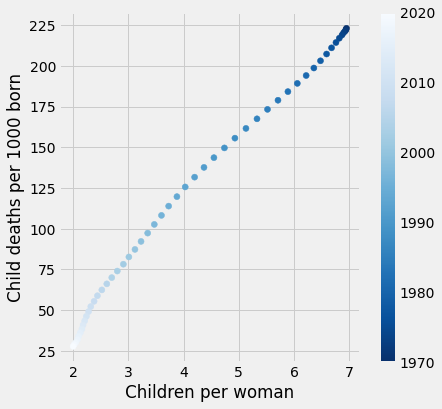

In [14]:
bgd_fertility = fertility.where("geo", "bgd").drop("geo")
bgd_child_mortality = child_mortality.where("geo", "bgd").drop("geo")
fertility_and_child_mortality = bgd_fertility.join("time", bgd_child_mortality)
post_1969_fertility_and_child_mortality = bgd_fertility.join("time", bgd_child_mortality).where("time", are.above_or_equal_to(1970))
post_1969_fertility_and_child_mortality = post_1969_fertility_and_child_mortality.relabeled("children_per_woman_total_fertility", "Children per woman")
post_1969_fertility_and_child_mortality = post_1969_fertility_and_child_mortality.relabeled("child_mortality_under_5_per_1000_born", "Child deaths per 1000 born")

# Don't change anything below this line!
x_births = post_1969_fertility_and_child_mortality.column("Children per woman")
y_deaths = post_1969_fertility_and_child_mortality.column("Child deaths per 1000 born")
time_colors = post_1969_fertility_and_child_mortality.column("time")

plots.figure(figsize=(6,6))
plots.scatter(x_births, y_deaths, c=time_colors, cmap="Blues_r")
plots.colorbar()                  
plots.xlabel("Children per woman")
plots.ylabel("Child deaths per 1000 born");

The plot above uses **color** to encode data about the `time` column from the table `post_1969_fertility_and_child_mortality`. The colors, ranging from dark blue to white, represent the passing of time between the 1970s to the 2020s. For example, a point on the scatter plot representing data from the 1970s would appear as **dark blue** and a point from the 2010s would appear as **light blue**.

The association that is illustrated by this scatter diagram show that reduced child mortality *causes* parents to choose to have fewer children.

Reading the graph carefully, we can see that as times goes by, the number of children's deaths are decreasing, thus pointing out that child mortality is getting better. Since there are fewer deaths and better child mortality, more mother's are having lesser children.

Possibly the reason parents are having lesser children because the probability that a child will live into adulthood is getting higher. Thus, making it more of a reason to concentrate their resources on the fewer children they have.

### The World

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.